<a href="https://colab.research.google.com/github/johannnamr/Discrepancy-based-inference-using-QMC/blob/main/Inference/Mv-g-and-k-distribution/mvgandk_conv_sink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate g-and-k distribution

Notebook for the convergence of the Sinkhorn divergence

### Mount Drive

In [ ]:
# mount my drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


The following path has to be adjusted if necessary:

In [ ]:
%run "/content/drive/My Drive/Colab Notebooks/Utils.ipynb"
%run "/content/drive/My Drive/Colab Notebooks/Plot_fcts.ipynb"

     |████████████████████████████████| 1.6MB 12.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 4.0 MB 13.2 MB/s 
  distutils: /usr/local/lib/python3.7/dist-packages
  sysconfig: /usr/lib/python3.7/site-packages
  distutils: /usr/local/lib/python3.7/dist-packages
  sysconfig: /usr/lib/python3.7/site-packages
  distutils: /usr/local/include/python3.7/qmcpy
  sysconfig: /usr/include/python3.7m/qmcpy
  distutils: /usr/local/bin
  sysconfig: /usr/bin
  distutils: /usr/local
  sysc

Set path for saving the results (adjust if necessary):

In [ ]:
path = '/content/drive/My Drive/Colab Notebooks/Paper/Inference/'

## Sinkhorn divergence convergence for varying $n$

In [ ]:
np.random.seed(11)

Set parameters:

In [ ]:
n = [ 2**j for j in range(3,14) ]          # number of simulated samples - powers of 2
num = 25                                   # numbers of repetitions for MC and RQMC
theta = np.array([3,1,1,-np.log(2),0.1])   # true theta
d = 1                                      # dimensions of data
p = theta.shape[0]                         # dimensions of parameter space
e = 5*d                                    # parameter for Sinkhorn divergence
inv = True                                 # True: use inverse transform, False: use Box-Muller transform
method = 'sinkhorn_stabilized'             # 'sinkhorn' or 'sinkhorn_stabilized' or 'sinkhorn_epsilon_scaling'
cost = 'sqeuclidean'                       # distance used for ground cost ('euclidean', 'sqeuclidean',‘minkowski’ or ‘cityblock’)

Define the QMC sequence:

In [ ]:
if inv:
  qmc = qmcpy.Halton(d)
else:  
  qmc = qmcpy.Halton(d+1)

Calculate Sinkhorn divergencee for varying $n$:

In [ ]:
if inv:
  sink_mc,sink_qmc,sink_rqmc,sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc = sink_conv_inv('mvgandk',n,num,d,e,theta,s=2, method=method,cost=cost)
else:
  sink_mc,sink_qmc,sink_rqmc,sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc = sink_conv('mvgandk',n,num,d,e,theta,s=2, method=method,cost=cost)

sample size:  8
sample size:  16
sample size:  32
sample size:  64
sample size:  128
sample size:  256
sample size:  512
sample size:  1024
sample size:  2048
sample size:  4096
sample size:  8192


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61


Plot the Sinkhorn divergence against $n$:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83


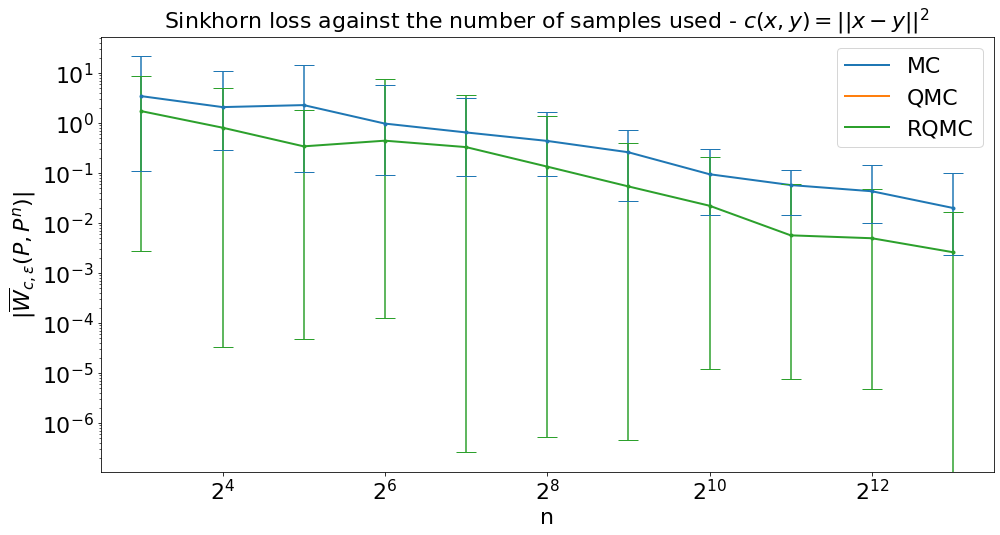

In [ ]:
plot_sink_conv(d,(16,8),sink_mc,sink_qmc,sink_rqmc,'MC','QMC','RQMC',sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc)

In [ ]:
np.savez(path+"mvgandk_sink_n_d=%s_%s.npz" %(d,cost), sink_mc=sink_mc,sink_min_mc=sink_min_mc,sink_max_mc=sink_max_mc,sink_rqmc=sink_rqmc,sink_min_rqmc=sink_min_rqmc,sink_max_rqmc=sink_max_rqmc,sink_qmc=sink_qmc)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136


## Sinkhorn divergence for varying $d$

Calculate Sinkhorn divergence for varying $d$:

In [ ]:
np.random.seed(11)

In [ ]:
n = 2**12                                   # number of simulated samples
d = [1,5,10,15,20,25,50,75,100,150,200,300] # dimensions of data
num = 25                                    # numbers of repetitions for MC and RQMC
theta = np.array([3,1,1,-np.log(2),0.1])    # true theta
p = theta.shape[0]                          # dimensions of parameter space
e = 5                                       # parameter for Sinkhorn divergence
inv = True                                  # True: use inverse transform, False: use Box-Muller transform
eadapt = True                               # True: e is proportional to d
method = 'sinkhorn_stabilized'              # 'sinkhorn' or 'sinkhorn_stabilized' or 'sinkhorn_epsilon_scaling'
cost = 'sqeuclidean'                         # distance used for ground cost ('euclidean', 'sqeuclidean',‘minkowski’ or ‘cityblock’)

Define the QMC sequence:

In [ ]:
if inv:
  qmc = qmcpy.Halton(np.max(d))
else:  
  qmc = qmcpy.Halton(np.max(d)+1)

Calculate Sinkhorn divergence for varying $d$:

In [ ]:
if inv:
  sink_mc,sink_qmc,sink_rqmc,sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc = sink_conv_inv_d('mvgandk',n,num,d,e,theta,s=2,eadapt=eadapt,method=method,cost=cost)
else:
  sink_mc,sink_qmc,sink_rqmc,sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc = sink_conv_d('mvgandk',n,num,d,e,theta,s=2,eadapt=eadapt,method=method,cost=cost)

Plot Sinkhorn divergence for varying $d$:

In [ ]:
plot_sink_conv_d(d,(16,8),sink_mc,sink_qmc,sink_rqmc,'MC','QMC','RQMC',sink_min_mc,sink_max_mc,sink_min_rqmc,sink_max_rqmc)

In [ ]:
np.savez(path+"mvgandk_sink_d_n=8192_%s.npz" %cost, sink_mc=sink_mc,sink_min_mc=sink_min_mc,sink_max_mc=sink_max_mc,sink_rqmc=sink_rqmc,sink_min_rqmc=sink_min_rqmc,sink_max_rqmc=sink_max_rqmc,sink_qmc=sink_qmc)